In [1]:
import numpy as np
import pandas as pd
#from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Import LabelEncoder
from sklearn import preprocessing

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

In [4]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [5]:
X=data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']]
y=data['left']

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test


In [7]:
clf = MLPClassifier(hidden_layer_sizes=(6,5), random_state=5, verbose=False, learning_rate_init=0.01, max_iter = 200)

In [8]:
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [9]:
ypred=clf.predict(X_test)

In [10]:
accuracy_score(y_test,ypred)

0.9386666666666666

In [11]:
confusion_matrix(y_test,ypred)

array([[3248,  180],
       [  96,  976]], dtype=int64)

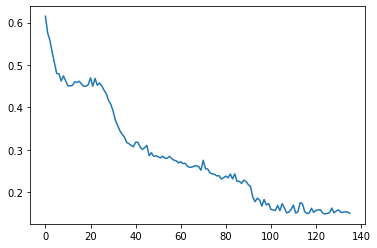

In [12]:
plt.plot(clf.loss_curve_)

In [13]:
clf2 = MLPClassifier(hidden_layer_sizes=(6,5), random_state=5, verbose=True, learning_rate_init=0.001, max_iter = 200)

In [14]:
clf2.fit(X_train,y_train)

Iteration 1, loss = 0.72543484
Iteration 2, loss = 0.61261943
Iteration 3, loss = 0.59907926
Iteration 4, loss = 0.59548627
Iteration 5, loss = 0.59259521
Iteration 6, loss = 0.58998521
Iteration 7, loss = 0.58773222
Iteration 8, loss = 0.58457272
Iteration 9, loss = 0.58275628
Iteration 10, loss = 0.58015874
Iteration 11, loss = 0.57779654
Iteration 12, loss = 0.57551772
Iteration 13, loss = 0.57320845
Iteration 14, loss = 0.56947047
Iteration 15, loss = 0.56459607
Iteration 16, loss = 0.55827398
Iteration 17, loss = 0.55267989
Iteration 18, loss = 0.54574165
Iteration 19, loss = 0.53960153
Iteration 20, loss = 0.53429264
Iteration 21, loss = 0.52960101
Iteration 22, loss = 0.52264950
Iteration 23, loss = 0.51756843
Iteration 24, loss = 0.51191457
Iteration 25, loss = 0.50662987
Iteration 26, loss = 0.50167148
Iteration 27, loss = 0.49665251
Iteration 28, loss = 0.49264883
Iteration 29, loss = 0.48762493
Iteration 30, loss = 0.48235799
Iteration 31, loss = 0.47445148
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), random_state=5, verbose=True)

In [15]:
ypred2=clf2.predict(X_test)
accuracy_score(y_test,ypred2)

0.9144444444444444

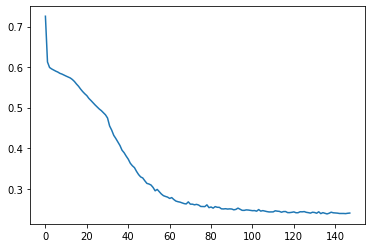

In [16]:
plt.plot(clf2.loss_curve_)

In [17]:
clf3 = MLPClassifier(hidden_layer_sizes=(6,5), random_state=5, verbose=True, learning_rate_init=0.01, early_stopping = True, validation_fraction = 0.3)

In [18]:
clf3.fit(X_train,y_train)

Iteration 1, loss = 0.63543777
Validation score: 0.755556
Iteration 2, loss = 0.58567266
Validation score: 0.761270
Iteration 3, loss = 0.57317023
Validation score: 0.761905
Iteration 4, loss = 0.56198454
Validation score: 0.761905
Iteration 5, loss = 0.55065966
Validation score: 0.761905
Iteration 6, loss = 0.53407795
Validation score: 0.761905
Iteration 7, loss = 0.53174057
Validation score: 0.761905
Iteration 8, loss = 0.50869003
Validation score: 0.752698
Iteration 9, loss = 0.49452206
Validation score: 0.750159
Iteration 10, loss = 0.49701844
Validation score: 0.757460


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Iteration 11, loss = 0.47085668
Validation score: 0.751111
Iteration 12, loss = 0.46907924
Validation score: 0.772063
Iteration 13, loss = 0.45926447
Validation score: 0.761587
Iteration 14, loss = 0.46641126
Validation score: 0.753016
Iteration 15, loss = 0.46716377
Validation score: 0.774286
Iteration 16, loss = 0.45918992
Validation score: 0.754286
Iteration 17, loss = 0.46809787
Validation score: 0.760000
Iteration 18, loss = 0.45202626
Validation score: 0.774603
Iteration 19, loss = 0.45803787
Validation score: 0.754603
Iteration 20, loss = 0.46967719


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.765714
Iteration 21, loss = 0.44867441
Validation score: 0.754921
Iteration 22, loss = 0.47147623
Validation score: 0.758413
Iteration 23, loss = 0.45422628
Validation score: 0.765397
Iteration 24, loss = 0.45270973
Validation score: 0.752381
Iteration 25, loss = 0.43766918
Validation score: 0.765714
Iteration 26, loss = 0.42956906
Validation score: 0.786032
Iteration 27, loss = 0.42263798
Validation score: 0.770476
Iteration 28, loss = 0.41181144
Validation score: 0.785079
Iteration 29, loss = 0.40094415


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.765714
Iteration 30, loss = 0.38315447
Validation score: 0.781270
Iteration 31, loss = 0.38314511
Validation score: 0.786349
Iteration 32, loss = 0.36103258
Validation score: 0.805079
Iteration 33, loss = 0.35510023
Validation score: 0.842857
Iteration 34, loss = 0.34050989
Validation score: 0.836508
Iteration 35, loss = 0.33306514
Validation score: 0.837778
Iteration 36, loss = 0.32223209
Validation score: 0.845714
Iteration 37, loss = 0.32593037
Validation score: 0.853333
Iteration 38, loss = 0.32145344


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.848889
Iteration 39, loss = 0.30834752
Validation score: 0.862540
Iteration 40, loss = 0.30270998
Validation score: 0.846032
Iteration 41, loss = 0.30514114
Validation score: 0.852698
Iteration 42, loss = 0.30457195
Validation score: 0.869524
Iteration 43, loss = 0.30081454
Validation score: 0.858730
Iteration 44, loss = 0.29832796
Validation score: 0.871429
Iteration 45, loss = 0.29411047
Validation score: 0.864444
Iteration 46, loss = 0.29364408
Validation score: 0.874603
Iteration 47, loss = 0.29948990


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.877143
Iteration 48, loss = 0.30085959
Validation score: 0.871746
Iteration 49, loss = 0.29224552
Validation score: 0.866667
Iteration 50, loss = 0.29122919
Validation score: 0.861587
Iteration 51, loss = 0.29541910
Validation score: 0.877143
Iteration 52, loss = 0.28420572
Validation score: 0.886984
Iteration 53, loss = 0.28594829
Validation score: 0.885397
Iteration 54, loss = 0.27946451
Validation score: 0.879683
Iteration 55, loss = 0.27788344
Validation score: 0.879365
Iteration 56, loss = 0.30129978


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.887302
Iteration 57, loss = 0.27303292
Validation score: 0.890159
Iteration 58, loss = 0.27261646
Validation score: 0.889206
Iteration 59, loss = 0.28670662
Validation score: 0.886349
Iteration 60, loss = 0.28393853
Validation score: 0.882857
Iteration 61, loss = 0.27384085
Validation score: 0.873651
Iteration 62, loss = 0.27211494
Validation score: 0.885079
Iteration 63, loss = 0.27034554
Validation score: 0.893016
Iteration 64, loss = 0.26895025
Validation score: 0.889206
Iteration 65, loss = 0.26817309


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.889841
Iteration 66, loss = 0.26561865
Validation score: 0.890794
Iteration 67, loss = 0.27637189
Validation score: 0.893968
Iteration 68, loss = 0.26424522
Validation score: 0.864444
Iteration 69, loss = 0.27046673
Validation score: 0.884127
Iteration 70, loss = 0.26333674
Validation score: 0.894921
Iteration 71, loss = 0.25938725
Validation score: 0.899365
Iteration 72, loss = 0.25394028
Validation score: 0.898413
Iteration 73, loss = 0.25804137
Validation score: 0.901905
Iteration 74, loss = 0.26667976


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.897460
Iteration 75, loss = 0.26224174
Validation score: 0.876190
Iteration 76, loss = 0.27377292
Validation score: 0.867619
Iteration 77, loss = 0.25478410
Validation score: 0.898730
Iteration 78, loss = 0.26811799
Validation score: 0.902857
Iteration 79, loss = 0.24730617
Validation score: 0.905079
Iteration 80, loss = 0.25223777
Validation score: 0.892063
Iteration 81, loss = 0.26067401
Validation score: 0.901587
Iteration 82, loss = 0.25015774


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.903175
Iteration 83, loss = 0.27858371
Validation score: 0.896190
Iteration 84, loss = 0.25889278
Validation score: 0.898413
Iteration 85, loss = 0.25039661
Validation score: 0.905079
Iteration 86, loss = 0.24776025
Validation score: 0.905714
Iteration 87, loss = 0.24556800
Validation score: 0.899048
Iteration 88, loss = 0.24527817
Validation score: 0.907302
Iteration 89, loss = 0.25099000
Validation score: 0.906032
Iteration 90, loss = 0.25615656
Validation score: 0.910476
Iteration 91, loss = 0.24358439


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.909524
Iteration 92, loss = 0.25073289
Validation score: 0.900000
Iteration 93, loss = 0.26346382
Validation score: 0.900635
Iteration 94, loss = 0.24171722
Validation score: 0.888571
Iteration 95, loss = 0.26358095
Validation score: 0.909206
Iteration 96, loss = 0.23966092
Validation score: 0.909841
Iteration 97, loss = 0.24828305
Validation score: 0.912698
Iteration 98, loss = 0.24697532
Validation score: 0.903810
Iteration 99, loss = 0.25058189
Validation score: 0.907619
Iteration 100, loss = 0.25999732


C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\sachi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

Validation score: 0.901905
Iteration 101, loss = 0.25932968
Validation score: 0.908571
Iteration 102, loss = 0.24716404
Validation score: 0.897778
Iteration 103, loss = 0.25454736
Validation score: 0.893651
Iteration 104, loss = 0.27592451
Validation score: 0.900635
Iteration 105, loss = 0.24430213
Validation score: 0.911746
Iteration 106, loss = 0.24403824
Validation score: 0.908889
Iteration 107, loss = 0.25264782
Validation score: 0.905397
Iteration 108, loss = 0.23621858
Validation score: 0.910159
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(6, 5),
              learning_rate_init=0.01, random_state=5, validation_fraction=0.3,
              verbose=True)

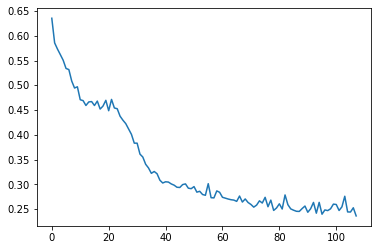

In [19]:
plt.plot(clf3.loss_curve_)

In [20]:
ypred3=clf3.predict(X_test)

In [21]:
accuracy_score(y_test,ypred3)

0.9077777777777778